In [1]:
import os
from glob import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import AdaptiveAvgPool2d

from torchvision.models import densenet121, resnet50

import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

In [2]:
from PIL import Image

from torchvision import transforms
from torchvision.models import densenet121, DenseNet121_Weights

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
from Res2Net.res2net import res2net50

In [6]:
m = res2net50(pretrained=True)

Downloading: "https://shanghuagao.oss-cn-beijing.aliyuncs.com/res2net/res2net50_26w_4s-06e79181.pth" to /home2/arihanth.srikar/.cache/torch/hub/checkpoints/res2net50_26w_4s-06e79181.pth
100%|██████████| 98.3M/98.3M [04:05<00:00, 419kB/s] 


In [8]:
m

Res2Net(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottle2neck(
      (conv1): Conv2d(64, 104, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(104, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (pool): AvgPool2d(kernel_size=3, stride=1, padding=1)
      (convs): ModuleList(
        (0-2): 3 x Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (bns): ModuleList(
        (0-2): 3 x BatchNorm2d(26, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (conv3): Conv2d(104, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_ru

In [7]:
img = torch.rand(1, 3, 224, 224)
out = m(img)
print(out.shape)

torch.Size([1, 1000])


In [45]:
img = torch.rand(1, 3, 224, 224)
model = resnet50()
model.fc = nn.Identity()

In [46]:
out = model.conv1(img)
out = model.bn1(out)
out = model.relu(out)
out = model.maxpool(out)
out = model.layer1(out)
print(out.shape)

torch.Size([1, 256, 56, 56])


In [26]:
out = model.conv1(img)
out = model.bn1(out)
out = model.relu(out)
out = model.maxpool(out)
out = model.layer1(out)
l1 = out.clone()
out = model.layer2(out)
l2 = out.clone()
out = model.layer3(out)
l3 = out.clone()
out = model.layer4(out)
l4 = out.clone()
out = model.avgpool(out)
out = torch.flatten(out, 1)

In [27]:
l1.shape, l2.shape, l3.shape, l4.shape

(torch.Size([1, 256, 56, 56]),
 torch.Size([1, 512, 28, 28]),
 torch.Size([1, 1024, 14, 14]),
 torch.Size([1, 2048, 7, 7]))

In [33]:
oneDconv = nn.Conv2d(256, 1, 1)

oneDconv(l1).shape

torch.Size([1, 1, 56, 56])

In [5]:
df1 = pd.read_csv('data/mimic_cxr_jpg/mimic-cxr-2.0.0-chexpert.csv').fillna(0).replace(-1, 1)
df2 = pd.read_csv('data/mimic_cxr_jpg/mimic-cxr-2.0.0-split.csv')

In [6]:
df = df1.merge(df2, on=['study_id', 'subject_id'])
df.head()

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,dicom_id,split
0,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,train
1,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,train
2,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,train
3,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,train
4,10000032,53911762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,train


In [7]:
all_image_names = sorted(glob('/home/ssd_scratch/users/arihanth.srikar/physionet.org/files/mimic-cxr-jpg/2.0.0/files/**/*.jpg', recursive=True))

In [8]:
all_image_ids = [img_name.split('/')[-1].split('.')[0] for img_name in all_image_names]
len(all_image_ids)

373762

In [9]:
all_dicom_ids = df['dicom_id'].tolist()
# all_dicom_ids = df[df['split'] == 'validate']['dicom_id'].tolist()
len(all_dicom_ids)

377095

In [10]:
present_ids = sorted(list(set(all_image_ids) & set(all_dicom_ids)))
len(present_ids)

373747

In [11]:
df[df['dicom_id'].isin(present_ids)].to_csv('data/mimic_cxr_jpg/mimic-cxr-2.0.0-final.csv', index=False)

In [12]:
df_final = pd.read_csv('data/mimic_cxr_jpg/mimic-cxr-2.0.0-final.csv')
df_final.head()

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,dicom_id,split
0,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,train
1,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,train
2,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,train
3,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,train
4,10000032,53911762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,train


In [13]:
df_final.iloc[0][df_final.columns[2:16]].values

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
       0.0], dtype=object)

In [14]:
from PIL import Image
from torch.utils.data import Dataset, DataLoader

In [15]:
class CustomDataset(Dataset):
    def __init__(self, config, split='val'):
        self.config = config
        self.split = 'validate' if 'val' in split else split
        self.df = pd.read_csv('data/mimic_cxr_jpg/mimic-cxr-2.0.0-final.csv')
        self.df = self.df[self.df['split'] == self.split]

        self.my_transforms = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.Lambda(lambda x: x.convert('RGB')),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        pid = str(row['subject_id'])
        sid = str(row['study_id'])
        img_id = row['dicom_id']
        img_fname = f'{self.config["data_dir"]}p{pid[:2]}/p{pid}/s{sid}/{img_id}.jpg'
        
        img = Image.open(img_fname)
        img = self.my_transforms(img)
        
        label = torch.tensor(row[self.df.columns[2:16]].values.astype(np.float32))
        
        return img, label

In [16]:
config = {
    'data_dir': '/home/ssd_scratch/users/arihanth.srikar/physionet.org/files/mimic-cxr-jpg/2.0.0/files/',
}

val_dataset = CustomDataset(config, split='val')
val_loader  = DataLoader(val_dataset, batch_size=8, shuffle=False)

In [17]:
for batch in tqdm(val_loader):
    imgs, labels = batch
    break

  0%|          | 0/371 [00:00<?, ?it/s]


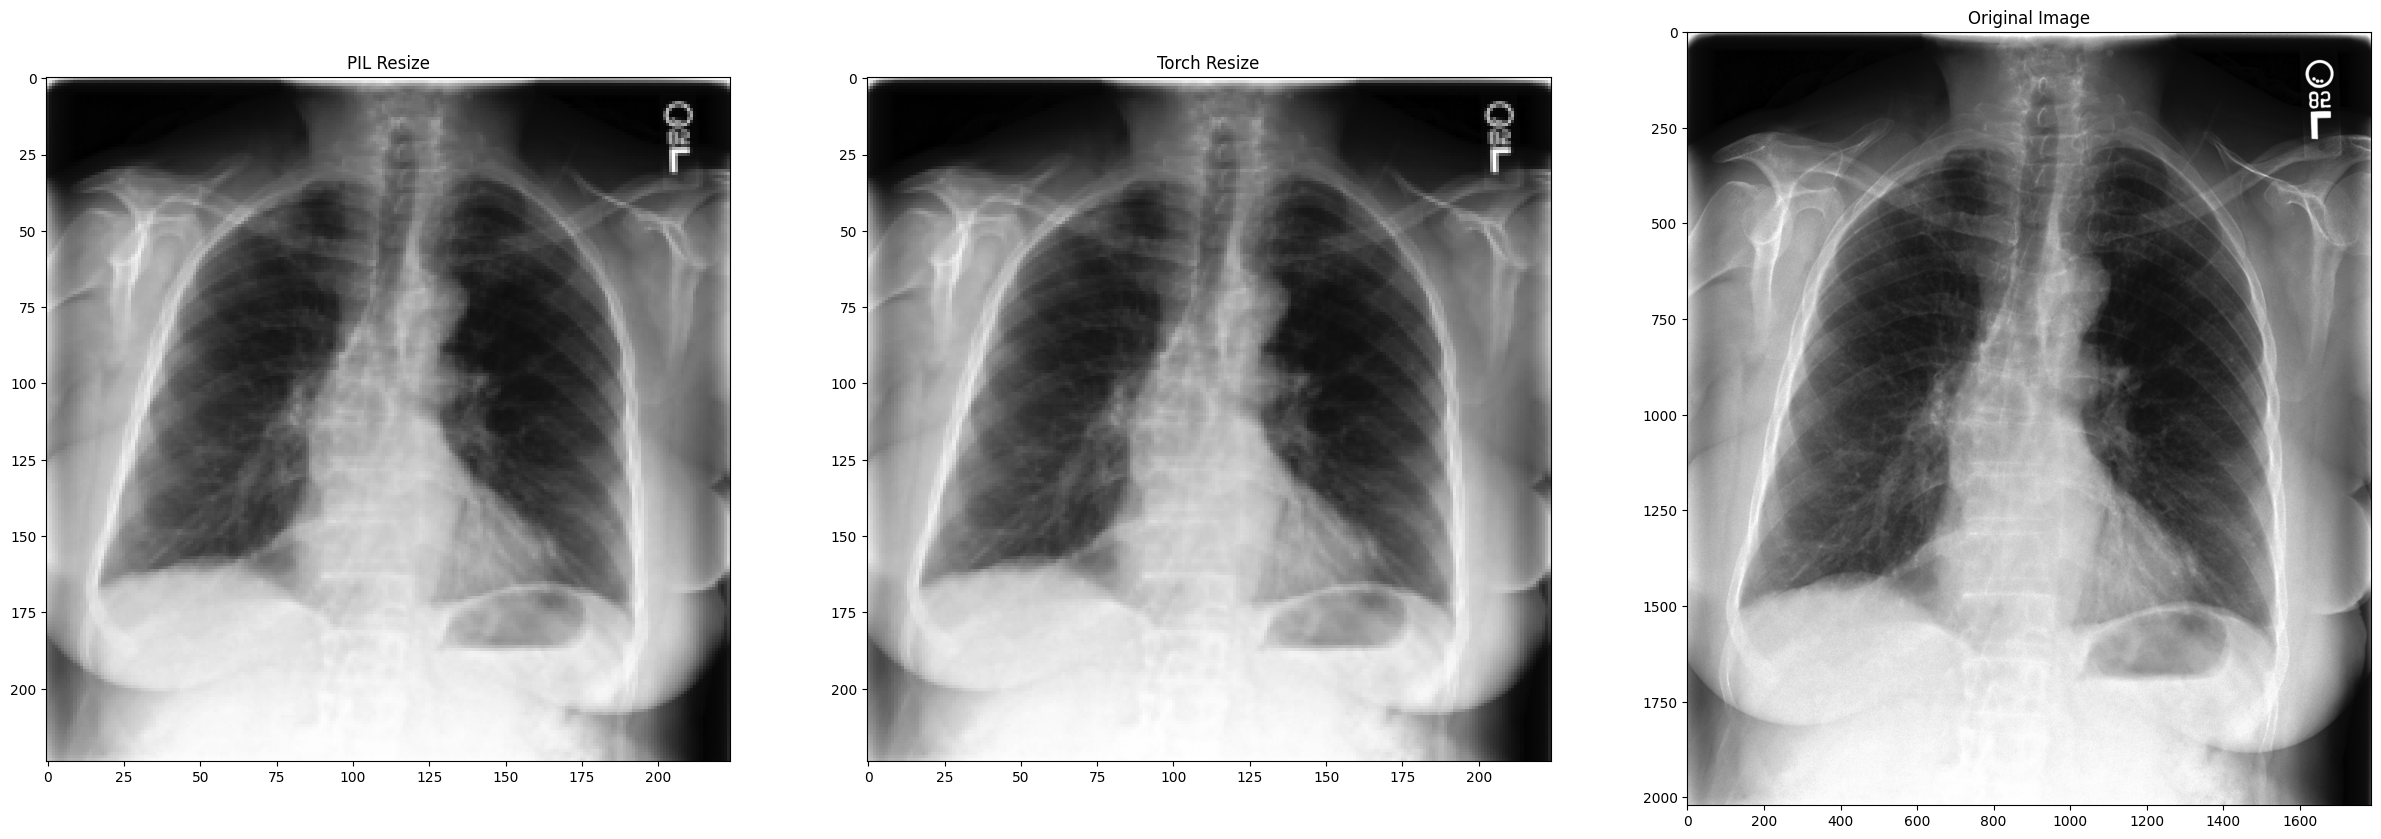

In [37]:
img = Image.open(all_image_names[122])

my_transforms = transforms.Compose([
    transforms.Resize((224, 224), antialias=True),
])
my_transforms_tensor = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224), antialias=True),
])

plt.figure(figsize=(30,30))
plt.subplot(1,3,1)
plt.title('PIL Resize')
plt.imshow(my_transforms(img), cmap='gray')
plt.subplot(1,3,2)
plt.title('Torch Resize')
plt.imshow(my_transforms_tensor(img).squeeze(0), cmap='gray')
plt.subplot(1,3,3)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

In [12]:
label_files = sorted(glob('/scratch/arihanth.srikar/train/*_labels.npy'))
len(label_files)

image_files = sorted(glob('/scratch/arihanth.srikar/train/*_image.npy'))
len(image_files)

211413

In [13]:
labels = [np.load(l) for l in tqdm(label_files)]
np.array(labels).shape

100%|██████████| 211413/211413 [23:31<00:00, 149.79it/s]


(211413, 14)

In [11]:
for img_name in tqdm(image_files):
    img = np.load(img_name)

100%|██████████| 3030/3030 [00:06<00:00, 443.10it/s] 


In [4]:
all_label_names = [  'Atelectasis',
                'Cardiomegaly',
                'Consolidation',
                'Edema',
                'Enlarged Cardiomediastinum',
                'Fracture',
                'Lung Lesion',
                'Lung Opacity',
                'No Finding',
                'Pleural Effusion',
                'Pleural Other',
                'Pneumonia',
                'Pneumothorax',
                'Support Devices']

In [5]:
df1 = pd.read_csv('data/mimic_cxr_jpg/mimic-cxr-2.0.0-chexpert.csv').fillna(0).replace(-1, 0)
df2 = pd.read_csv('data/mimic_cxr_jpg/mimic-cxr-2.0.0-split.csv')
df = pd.merge(df1, df2, on=['subject_id', 'study_id'])

In [13]:
test_lable_names = sorted(glob('/scratch/arihanth.srikar/test/*_labels.npy'))
test_lable_names[:2]

['/scratch/arihanth.srikar/test/p10046166_s50051329_labels.npy',
 '/scratch/arihanth.srikar/test/p10046166_s51738740_labels.npy']

In [20]:
for lable_name in tqdm(test_lable_names):
    pid = lable_name.split('/')[-1].split('_')[0][1:]
    sid = lable_name.split('/')[-1].split('_')[1][1:]
    y = np.load(lable_name)
    gt_lable = df[(df['subject_id'] == int(pid)) & (df['study_id'] == int(sid))][df.columns[2:16]].values[0]
    assert np.all(y == gt_lable), f'p{pid}/s{sid}: {y} {gt_lable}'

100%|██████████| 3032/3032 [00:25<00:00, 119.47it/s]


In [8]:
df

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,dicom_id,split
0,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,train
1,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,train
2,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,train
3,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,train
4,10000032,53911762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377090,19999733,57132437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,428e2c18-5721d8f3-35a05001-36f3d080-9053b83c,train
377091,19999733,57132437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,58c403aa-35ff8bd9-73e39f54-8dc9cc5d-e0ec3fa9,train
377092,19999987,55368167,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58766883-376a15ce-3b323a28-6af950a0-16b793bd,train
377093,19999987,58621812,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7ba273af-3d290f8d-e28d0ab4-484b7a86-7fc12b08,train


In [30]:
long_prefix = '/home/ssd_scratch/users/arihanth.srikar/physionet.org/files/generalized-image-embeddings-for-the-mimic-chest-x-ray-dataset-1.0/files'
all_file_names = df.apply(lambda x: f"{long_prefix}/p{str(x['subject_id'])[:2]}/p{x['subject_id']}/s{x['study_id']}/{x['dicom_id']}.tfrecord", axis=1).to_list()

In [31]:
all_file_names[:2]

['/home/ssd_scratch/users/arihanth.srikar/physionet.org/files/generalized-image-embeddings-for-the-mimic-chest-x-ray-dataset-1.0/files/p10/p10000032/s50414267/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.tfrecord',
 '/home/ssd_scratch/users/arihanth.srikar/physionet.org/files/generalized-image-embeddings-for-the-mimic-chest-x-ray-dataset-1.0/files/p10/p10000032/s50414267/174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962.tfrecord']

In [6]:
train_df = df[df['split'] == 'train'].drop(columns=['dicom_id']).drop_duplicates().copy()
valid_df = df[df['split'] == 'validate'].drop(columns=['dicom_id']).drop_duplicates().copy()
test_df = df[df['split'] == 'test'].drop(columns=['dicom_id']).drop_duplicates().copy()

In [7]:
train_labels = train_df[train_df.columns[2:16].to_list()].to_numpy()
valid_labels = valid_df[valid_df.columns[2:16].to_list()].to_numpy()
test_labels  = test_df[test_df.columns[2:16].to_list()].to_numpy()

In [17]:
def my_plot(train_labels, test_labels, val_labels, plot_name):

    train_labels = train_labels.sum(axis=0)
    train_labels = train_labels / train_labels.sum()
    test_labels = test_labels.sum(axis=0)
    test_labels = test_labels / test_labels.sum()
    val_labels = val_labels.sum(axis=0)
    val_labels = val_labels / val_labels.sum()
    
    fig, ax = plt.subplots(figsize=(10, 10))
    y_pos = np.arange(len(all_label_names))
    width = 0.25
    ax.barh(y_pos - width, train_labels, width, align='center', color='blue', ecolor='black', label='train')
    ax.barh(y_pos, test_labels, width, align='center', color='green', ecolor='black', label='test')
    ax.barh(y_pos + width, val_labels, width, align='center', color='red', ecolor='black', label='val')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(all_label_names)
    ax.invert_yaxis()
    ax.set_xlabel('Number of images')
    ax.set_title(f'Distribution of labels in {plot_name} set')

    # print value beside the bar
    for i, v in enumerate(train_labels):
        ax.text(v, i - width + 0.1, f'{np.round(v, 2):.2f}', color='blue', fontweight='bold')
    for i, v in enumerate(test_labels):
        ax.text(v, i + 0.1, f'{np.round(v, 2):.2f}', color='green', fontweight='bold')
    for i, v in enumerate(val_labels):
        ax.text(v, i + width + 0.1, f'{np.round(v, 2):.2f}', color='red', fontweight='bold')
    ax.legend()
    plt.show()

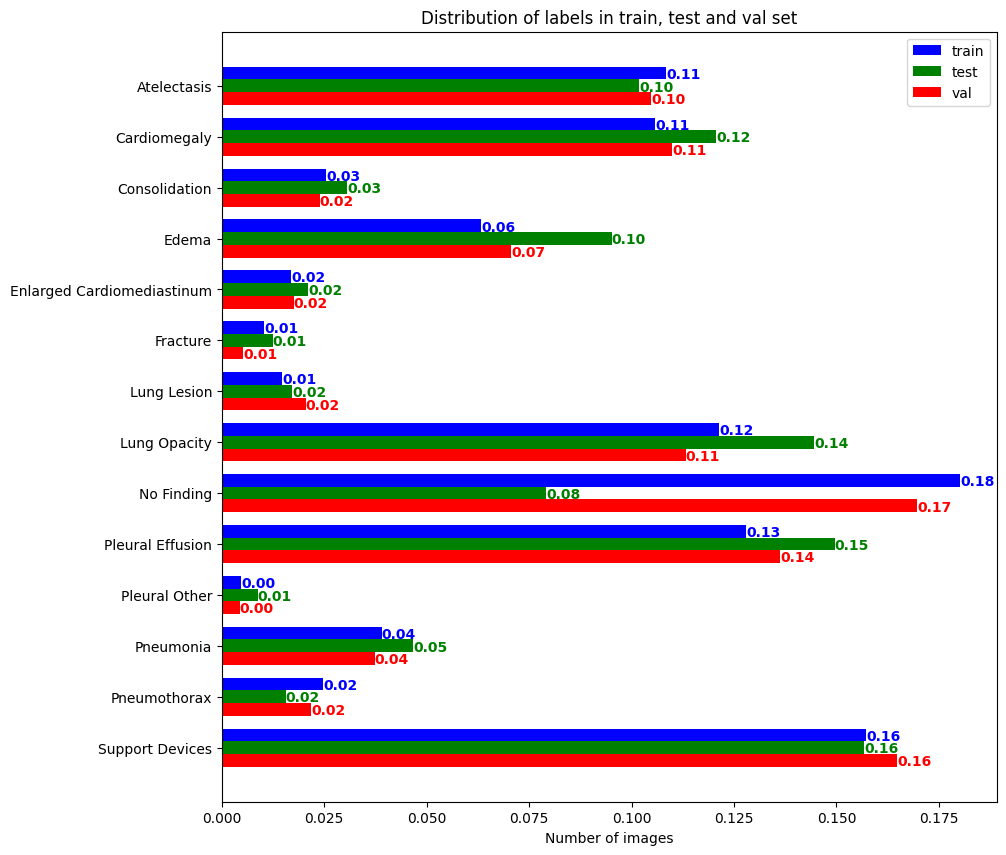

In [18]:
my_plot(train_labels, test_labels, valid_labels, 'train, test and val')

In [5]:
all_lables = [  'Atelectasis',
                'Cardiomegaly',
                'Consolidation',
                'Edema',
                'Enlarged Cardiomediastinum',
                'Fracture',
                'Lung Lesion',
                'Lung Opacity',
                'No Finding',
                'Pleural Effusion',
                'Pleural Other',
                'Pneumonia',
                'Pneumothorax',
                'Support Devices']

In [44]:
df1 = pd.read_csv('data/mimic_cxr_jpg/mimic-cxr-2.0.0-chexpert.csv').fillna(0).replace(-1, 0)
df2 = pd.read_csv('data/mimic_cxr_jpg/mimic-cxr-2.0.0-split.csv')
df = pd.merge(df1, df2, on=['subject_id', 'study_id'])
df = df[df['split'] == 'train']

In [45]:
distribution = {k: list(df[k].value_counts()) for k in all_lables}

for k, v in distribution.items():
    print(k, v)

Atelectasis [305460, 63485]
Cardiomegaly [306391, 62554]
Consolidation [354709, 14236]
Edema [333666, 35279]
Enlarged Cardiomediastinum [359193, 9752]
Fracture [361541, 7404]
Lung Lesion [358455, 10490]
Lung Opacity [294643, 74302]
No Finding [227706, 141239]
Pleural Effusion [294200, 74745]
Pleural Other [365626, 3319]
Pneumonia [343456, 25489]
Pneumothorax [354944, 14001]
Support Devices [287055, 81890]


In [48]:
total = 0
normalized_distribution = {k: v for k, v in distribution.items()}

for k, v in normalized_distribution.items():
    total += sum(v)

for k, v in normalized_distribution.items():
    normalized_distribution[k] = [x/total for x in v]

for k, v in normalized_distribution.items():
    print(k, [round(x*100, 2) for x in v], round(sum(v)*100, 2))

Atelectasis [5.91, 1.23] 7.14
Cardiomegaly [5.93, 1.21] 7.14
Consolidation [6.87, 0.28] 7.14
Edema [6.46, 0.68] 7.14
Enlarged Cardiomediastinum [6.95, 0.19] 7.14
Fracture [7.0, 0.14] 7.14
Lung Lesion [6.94, 0.2] 7.14
Lung Opacity [5.7, 1.44] 7.14
No Finding [4.41, 2.73] 7.14
Pleural Effusion [5.7, 1.45] 7.14
Pleural Other [7.08, 0.06] 7.14
Pneumonia [6.65, 0.49] 7.14
Pneumothorax [6.87, 0.27] 7.14
Support Devices [5.56, 1.59] 7.14


In [51]:
final_weights = [[x*100 for x in v] for k, v in normalized_distribution.items()]
final_weights

[[5.913773442808936, 1.2290837000482069],
 [5.931797809584472, 1.2110593332726713],
 [6.867245021034882, 0.2756121218222616],
 [6.4598478673747355, 0.6830092754824084],
 [6.954056256933379, 0.18880088592376332],
 [6.999514058425278, 0.1433430844318646],
 [6.939768413023234, 0.20308872983390863],
 [5.704353920348174, 1.4385032225089684],
 [4.4084387336091515, 2.734418409247991],
 [5.695777341957667, 1.447079800899476],
 [7.078600565705689, 0.06425657715145308],
 [6.649384441738315, 0.49347270111882724],
 [6.871794673228491, 0.2710624696286516],
 [5.557448555049824, 1.5854085878073194]]

In [18]:
custom_weights = [[0.2, 0.8], [0.6, 0.4]]
criterion = nn.BCELoss(weight=torch.tensor(custom_weights).float())
criterion2 = nn.BCELoss()

logits = torch.tensor([[0.1, 0.9], [0.9, 0.1]])
labels = torch.tensor([[0, 1], [0, 1]])

loss = criterion(logits, labels.float())
loss2 = criterion2(logits, labels.float())
print(loss, loss2)

tensor(0.6020) tensor(1.2040)


In [4]:
images_dir = "/home/ssd_scratch/users/arihanth.srikar/physionet.org/files/mimic-cxr-jpg/2.0.0/files/"
all_images = sorted(glob(images_dir + "/**/*.jpg", recursive=True))
len(all_images)

373762

In [5]:
from sklearn.metrics import confusion_matrix

y_true = [1, 1, 2, 0]
y_pred = [0, 1, 2, 0]

matrix = confusion_matrix(y_true, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.5000    1.0000    0.6667         1
           1     1.0000    0.5000    0.6667         2
           2     1.0000    1.0000    1.0000         1

    accuracy                         0.7500         4
   macro avg     0.8333    0.8333    0.7778         4
weighted avg     0.8750    0.7500    0.7500         4



In [27]:
split = 'validate'
data_prefix = "/home/ssd_scratch/users/arihanth.srikar/physionet.org/files/chest-imagenome/1.0.0/silver_dataset/scene_tabular/"
df = pd.read_pickle(f"{data_prefix}processed_bboxes_{split}.pkl")
image_names = ['_'.join(s.split('/')[-1].split('_')[:2]) for s in sorted(glob(f'/scratch/arihanth.srikar/{split}/*edges.npy'))]
bbox_names = sorted(list(set(df["bbox_name"].to_list())))

In [28]:
intersecting_images = sorted(list(set(df["image_id"].to_list()) & set([fn.split("/")[-1].split(".")[0] for fn in all_images])))
only_image_ids = [fn.split("/")[-1].split(".")[0] for fn in all_images]

In [29]:
all_ids = ['_'.join(all_images[only_image_ids.index(img)].split("/")[-3:-1]) for img in tqdm(intersecting_images)]

  0%|          | 0/1946 [00:00<?, ?it/s]

100%|██████████| 1946/1946 [00:08<00:00, 239.92it/s]


In [30]:
len(set(image_names)), len(set(all_ids))

(1722, 1722)

In [9]:
image_names[:2], all_ids[:2]

(['p10046166_s50051329', 'p10046166_s51738740'],
 ['p14851532_s59116935', 'p19182863_s57825235'])

In [18]:
missing_images = []
for img in all_ids:
    if img not in image_names:
        missing_images.append(img)
missing_images

[]

In [47]:
labels = [np.load(f'/scratch/arihanth.srikar/{split}/{img_name}_labels.npy') for img_name in tqdm(image_names)]
labels = np.array(labels)

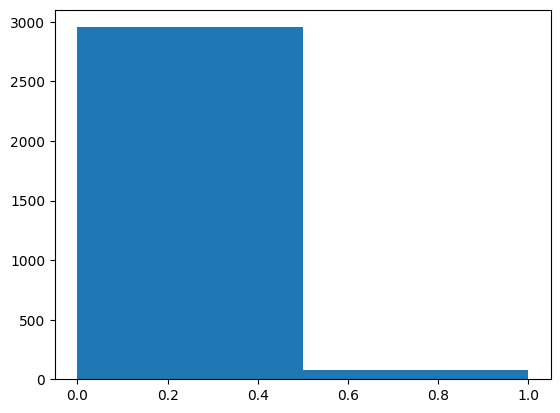

In [53]:
plt.hist(labels[:, 5], bins=2)
plt.show()

In [54]:
np.unique(labels[:, 5], return_counts=True)

(array([0., 1.], dtype=float32), array([2955,   77]))

In [66]:
df[df['split'] == 'test']['Fracture'].value_counts()

Fracture
0.0    118068
1.0      3116
Name: count, dtype: int64

In [5]:
print(bbox_names)

['abdomen', 'aortic arch', 'cardiac silhouette', 'carina', 'cavoatrial junction', 'descending aorta', 'left apical zone', 'left cardiac silhouette', 'left cardiophrenic angle', 'left clavicle', 'left costophrenic angle', 'left hemidiaphragm', 'left hilar structures', 'left lower lung zone', 'left lung', 'left mid lung zone', 'left upper abdomen', 'left upper lung zone', 'mediastinum', 'right apical zone', 'right atrium', 'right cardiac silhouette', 'right cardiophrenic angle', 'right clavicle', 'right costophrenic angle', 'right hemidiaphragm', 'right hilar structures', 'right lower lung zone', 'right lung', 'right mid lung zone', 'right upper abdomen', 'right upper lung zone', 'spine', 'svc', 'trachea', 'upper mediastinum']


In [6]:
df.columns[2:16]

Index(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity',
       'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia',
       'Pneumothorax', 'Support Devices'],
      dtype='object')

In [7]:
req_boxes = sorted([
    "right lung", "right apical zone", "right upper lung zone", "right mid lung zone", 
    "right lower lung zone", "right hilar structures", "right costophrenic angle", "left lung", "left apical zone",
    "left upper lung zone", "left mid lung zone", "left lower lung zone", "left hilar structures", 
    "left costophrenic angle", "mediastinum", "upper mediastinum", "cardiac silhouette", "trachea",
    ])
disease_list = [
    'Lung Opacity', 'Pleural Effusion', 'Atelectasis', 'Enlarged Cardiomediastinum',
    'Edema', 'Pneumothorax', 'Consolidation', 'Pneumonia'
    ]
req_idxs = set([bbox_names.index(box) for box in req_boxes])
req_idxs

{2, 6, 10, 12, 13, 14, 15, 17, 18, 19, 24, 26, 27, 28, 29, 31, 34, 35}

In [19]:
data_dir = '/scratch/arihanth.srikar'
prefix = 'p12955039_s54097156'

node_feats = np.load(f'{data_dir}/validate/{prefix}_node_features_resize.npy')
edges = np.load(f'{data_dir}/validate/{prefix}_edges.npy')
adj_mat = np.load(f'{data_dir}/validate/{prefix}_adj_mat.npy')
node_idx = np.load(f'{data_dir}/validate/{prefix}_node_idx.npy')
labels = np.load(f'{data_dir}/validate/{prefix}_labels.npy')

In [20]:
node_feats.shape, edges.shape, adj_mat.shape, node_idx.shape, labels.shape

((36, 1024), (36, 36), (36, 36), (36,), (14,))

In [10]:
node_feats[list(req_idxs)].shape

(18, 1024)

In [11]:
node_idx[list(req_idxs)]

array([29,  0,  8, 24, 17, 13, 12,  6, 10, 34, 32, 23, 33,  7, 21,  4, 20,
        3])

In [12]:
def get_edge_list(adj_mat, threshold=0.5):
    edge_list = []
    edge_weights = []
    index_corr = {val: i for i, val in enumerate(sorted(list(req_idxs)))}
    for i in range(adj_mat.shape[0]):
        if i not in req_idxs:
            continue
        for j in range(adj_mat.shape[1]):
            if j not in req_idxs:
                continue
            if adj_mat[i][j] >= threshold:
                edge_list.append([index_corr[i], index_corr[j]])
                edge_weights.append(adj_mat[i][j])
    return np.array(edge_list), np.array(edge_weights)

In [13]:
threshold = 0.5
adj_mat = np.where(edges > threshold, 1, 0)
adj_mat = np.concatenate([arr[..., np.newaxis] for arr in adj_mat.nonzero()], axis=1)

edge_list, edge_weights = get_edge_list(edges, threshold=threshold)

In [14]:
# construct networkx graph
G = nx.Graph()
# G.add_nodes_from(node_idx)
G.add_edges_from(adj_mat)

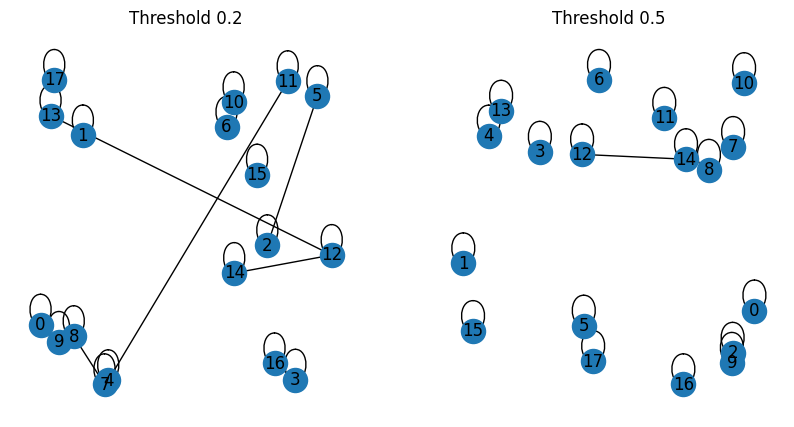

In [17]:
# plot 2 graphs side by side using matplotlib axes: with threshold 0.2 and 0.5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
g1 = nx.Graph()
g1.add_edges_from(get_edge_list(edges, threshold=0.2)[0])
g2 = nx.Graph()
g2.add_edges_from(get_edge_list(edges, threshold=0.5)[0])
ax1.set_title('Threshold 0.2')
ax2.set_title('Threshold 0.5')
nx.draw(g1, with_labels=True, pos=nx.random_layout(g1), ax=ax1)
nx.draw(g2, with_labels=True, pos=nx.random_layout(g2), ax=ax2)


In [42]:
from torch_geometric.data import Data, Dataset, DataLoader

/home2/arihanth.srikar/miniconda3/envs/pytorch2/lib/python3.10/site-packages/torch_geometric/typing.py:47: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /lib/x86_64-linux-gnu/libm.so.6: version `GLIBC_2.29' not found (required by /home2/arihanth.srikar/miniconda3/envs/pytorch2/lib/python3.10/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/home2/arihanth.srikar/miniconda3/envs/pytorch2/lib/python3.10/site-packages/torch_geometric/typing.py:101: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /lib/x86_64-linux-gnu/libm.so.6: version `GLIBC_2.29' not found (required by /home2/arihanth.srikar/miniconda3/envs/pytorch2/lib/python3.10/site-packages/torch_sparse/_metis_cuda.so)
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/home2/arihanth.srikar/miniconda3/envs/pytorch2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgres

In [46]:
class NewDataset(Dataset):
    def __init__(self, config: dict, data_dir: str='/scratch/arihanth.srikar', split: str='val', threshold: float=0.5):
        super().__init__()
        
        split = 'validate' if split == 'val' else split
        self.split = split
        self.threshold = threshold
        
        self.req_boxes = sorted([
            "right lung", "right apical zone", "right upper lung zone", "right mid lung zone", 
            "right lower lung zone", "right hilar structures", "right costophrenic angle", "left lung", "left apical zone",
            "left upper lung zone", "left mid lung zone", "left lower lung zone", "left hilar structures", 
            "left costophrenic angle", "mediastinum", "upper mediastinum", "cardiac silhouette", "trachea",
            ])
        self.disease_list = [
            'Lung Opacity', 'Pleural Effusion', 'Atelectasis', 'Enlarged Cardiomediastinum',
            'Edema', 'Pneumothorax', 'Consolidation', 'Pneumonia'
            ]
        self.req_idxs = set([bbox_names.index(box) for box in self.req_boxes])
        
        self.data_dir = data_dir
        self.image_names = ['_'.join(s.split('/')[-1].split('_')[:2]) for s in sorted(glob(f'/scratch/arihanth.srikar/{split}/*edges.npy'))]

    def get_edge_list(self, adj_mat: np.ndarray, req_idxs: set, threshold: int=0.5):
        edge_list = []
        edge_weights = []
        index_corr = {val: i for i, val in enumerate(list(req_idxs))}
        for i in range(adj_mat.shape[0]):
            if i not in req_idxs:
                continue
            for j in range(adj_mat.shape[1]):
                if j not in req_idxs:
                    continue
                if adj_mat[i][j] >= threshold:
                    edge_list.append([index_corr[i], index_corr[j]])
                    edge_weights.append(adj_mat[i][j])
        return np.array(edge_list), np.array(edge_weights)
    
    def len(self):
        return len(self.image_names)
    
    def get(self, idx):
        prefix = self.image_names[idx]
        node_feats = np.load(f'{self.data_dir}/{self.split}/{prefix}_node_features_resize.npy')
        edges = np.load(f'{self.data_dir}/{self.split}/{prefix}_edges.npy')
        # adj_mat = np.load(f'{self.data_dir}/{self.split}/{prefix}_adj_mat.npy')
        # node_idx = np.load(f'{self.data_dir}/{self.split}/{prefix}_node_idx.npy')
        labels = np.load(f'{self.data_dir}/{self.split}/{prefix}_labels.npy')
        
        # adj_mat = np.where(edges > self.threshold, 1, 0)
        # adj_mat = np.concatenate([arr[..., np.newaxis] for arr in adj_mat.nonzero()], axis=1)
        
        edge_list, edge_weights = self.get_edge_list(edges, self.req_idxs, threshold=self.threshold)

        node_feats = torch.tensor(node_feats, dtype=torch.float)[list(self.req_idxs)]
        edge_list = torch.tensor(edge_list.T, dtype=torch.long)
        edge_attr = torch.tensor(edge_weights, dtype=torch.float)
        labels = torch.tensor(labels, dtype=torch.float).unsqueeze(0)

        sample = Data(x=node_feats, edge_index=edge_list, edge_attr=edge_attr, y=labels)
        
        return sample

In [49]:
val_dataset = NewDataset({}, split='val', threshold=0.5)
val_loader  = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [50]:
for batch in val_loader:
    print(batch)
    break

DataBatch(x=[576, 1024], edge_index=[2, 675], edge_attr=[675], y=[32, 14], batch=[576], ptr=[33])


In [24]:
def print_metrics(file_name: str):
    with open(file_name, 'r') as f:
        saved_metrics = f.read().split('\n')

    MAP, MHR, MRR = [], [], []

    for metric in saved_metrics:
        if 'MAP' in metric:
            MAP.append(float(metric.split(': ')[1]))
        elif 'MHR' in metric:
            MHR.append(float(metric.split(': ')[1]))
        elif 'MRR' in metric:
            MRR.append(float(metric.split(': ')[1]))

    print(f'MAP: {np.mean(MAP):.3f}, MHR: {np.mean(MHR):.3f}, MRR: {np.mean(MRR):.3f}')

In [25]:
print_metrics('pretrained_densenet_metrics.txt')

MAP: 0.805, MHR: 0.841, MRR: 0.899


In [26]:
print_metrics('fintuned_densenet_metrics.txt')

MAP: 0.757, MHR: 0.807, MRR: 0.872


In [27]:
print_metrics('graph_metrics.txt')

MAP: 0.794, MHR: 0.832, MRR: 0.890


In [28]:
print_metrics('graph_metrics_finetuned.txt')

MAP: 0.744, MHR: 0.794, MRR: 0.859


In [4]:
class GCNDataset(Dataset):
    
    def __init__(self,
                 config: dict,
                 data_prefix: str="/home/ssd_scratch/users/arihanth.srikar/physionet.org/files/chest-imagenome/1.0.0/silver_dataset/scene_tabular/",
                 images_dir: str="/home/ssd_scratch/users/arihanth.srikar/physionet.org/files/mimic-cxr-jpg/2.0.0/files/",
                 split: str="val",
                 to_gen: int=-1) -> None:
        super(GCNDataset, self).__init__()
        
        self.config = config
        split = 'validate' if 'val' in split else split
        
        # bounding box files are stored here
        # data_prefix = "/ssd_scratch/cvit/arihanth/physionet.org/files/chest-imagenome/1.0.0/silver_dataset/scene_tabular/"

        # chest x-ray images are stored here
        # images_dir = "/ssd_scratch/cvit/arihanth/physionet.org/files/mimic-cxr-jpg/2.0.0/files/"
        
        print(f'Loading {split} data...')
        # self.images = sorted(glob(images_dir + "/**/*.npy", recursive=True))
        # self.is_numpy = len(self.images) > 0
        self.is_numpy = False
        self.images = self.images if self.is_numpy else sorted(glob(images_dir + "/**/*.jpg", recursive=True))

        print(f'Creating {split} dataframe...')
        try:
            self.df = pd.read_pickle(f"{data_prefix}processed_bboxes_{split}.pkl")
        except:
            df = pd.read_pickle(f"{data_prefix}processed_bboxes.pkl")
            df1 = pd.read_csv('data/mimic_cxr_jpg/mimic-cxr-2.0.0-chexpert.csv').fillna(0).replace(-1, 0)
            df2 = pd.read_csv('data/mimic_cxr_jpg/mimic-cxr-2.0.0-split.csv')
            df_split = pd.merge(df1, df2, on=['subject_id', 'study_id'])
            df_split.rename({'dicom_id': 'image_id'}, axis=1, inplace=True)
            df = pd.merge(df_split, df, on=['image_id'])
            self.df = df[df["split"] == split] if split != 'all' else df
            assert len(self.df) > 0, "No data found for the given split"
            del df, df1, df2, df_split
        print(f'Found {len(self.df)} images for {split} split')

        # find all images that have bounding boxes
        self.intersecting_images = list(set(self.df["image_id"].to_list()) & set([fn.split("/")[-1].split(".")[0] for fn in self.images]))

        # store only image id and maintain same indexing
        self.only_image_ids = [fn.split("/")[-1].split(".")[0] for fn in self.images]

        # get all bounding box names
        self.bbox_names = sorted(list(set(self.df["bbox_name"].to_list())))

        # decide length of dataset
        self.to_gen = to_gen if to_gen > 0 else len(self.intersecting_images)

        # define my_transform
        self.my_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
            # transforms.Normalize((0.5,), (0.5,))
        ])

        self.model = densenet121(weights=DenseNet121_Weights.DEFAULT)
        self.model.classifier = nn.Identity()
        
    def len(self):
        return self.to_gen
    
    def get(self, idx):
        # pick a random image (if req) and find its corresponding image file name
        # rand_idx = torch.randint(0, len(self.intersecting_images), (1,)).item() if self.to_gen != len(self.intersecting_images) else idx
        # cur_img_id = self.intersecting_images[rand_idx]
        cur_img_id = self.intersecting_images[idx]
        req_idx = self.only_image_ids.index(cur_img_id)

        # get patient id and study id
        cur_patient_id = self.images[req_idx].split("/")[-3]
        cur_study_id   = self.images[req_idx].split("/")[-2]

        try:
            if self.is_numpy:
                # read image and convert to RGB
                img = np.load(self.images[req_idx])
                img = torch.tensor(img, dtype=torch.float32).repeat(3, 1, 1)
            else:
                # read image and resize
                img = Image.open(self.images[req_idx])
                img = self.my_transform(img)

            # extract graph info about the image
            cur_img_boxes = self.df[self.df["image_id"] == cur_img_id][["x1", "y1", "x2", "y2", "bbox_name"]].to_numpy()
            labels = self.df[self.df["image_id"] == cur_img_id].values.tolist()[0][2:16]
        except:
            return self.get(torch.randint(0, len(self.intersecting_images), (1,)).item())

        # get node features
        node_idx = []
        node_features = []
        track_idx = []
        for i, (x1, y1, x2, y2, bbox_name) in enumerate(cur_img_boxes):
            bbox_id = self.bbox_names.index(bbox_name)
            if bbox_id not in node_idx:
                track_idx.append(i)
                node_idx.append(bbox_id)
                node_features.append(img[:, y1:y2, x1:x2])

        # get adjacency matrix
        edges = []
        track_idx = set(track_idx)
        for i, (x1, y1, x2, y2, _) in enumerate(cur_img_boxes):
            if i not in track_idx:
                continue
            edges.append([])
            for j, (x1_, y1_, x2_, y2_, _) in enumerate(cur_img_boxes):
                if j not in track_idx:
                    continue
                # find intersection over union
                intersection = max(0, min(x2, x2_) - max(x1, x1_)) * max(0, min(y2, y2_) - max(y1, y1_))
                union = (x2 - x1) * (y2 - y1) + (x2_ - x1_) * (y2_ - y1_) - intersection
                iou = intersection / (union+1e-8)
                edges[-1].append(iou)
        edges = np.array(edges)

        # threshold the adjacency matrix
        threshold = 0.2
        adj_mat = np.where(edges > threshold, 1, 0)

        # get node stuff
        node_idx = torch.tensor(node_idx).long()
        
        # have to pad node features as they are of different sized images
        largest_right  = 224
        largest_bottom = 224
        # largest_right  = max([node_features[i].shape[2] for i in range(len(node_features))])
        # largest_bottom = max([node_features[i].shape[1] for i in range(len(node_features))])

        node_features = [torch.nn.functional.pad(node_features[i], (0, largest_right - node_features[i].shape[2], 0, largest_bottom - node_features[i].shape[1], 0, 0)) for i in range(len(node_features))]
        node_features = torch.stack(node_features)
        
        # find missing node indices, we know a total of 37 nodes are present
        missing_node_idx = list(set(range(len(self.bbox_names))) - set(node_idx.tolist()))
        num_missing = len(missing_node_idx)

        if num_missing:
            node_idx = torch.cat([node_idx, torch.tensor(missing_node_idx).long()])
            node_features = torch.cat([node_features, torch.zeros(num_missing, node_features.shape[1], node_features.shape[2], node_features.shape[3])])
            adj_mat = np.pad(adj_mat, ((0, num_missing), (0, num_missing)))
            edges = np.pad(edges, ((0, num_missing), (0, num_missing)))
        
        # get adjacency matrix and edge features
        adj_mat = torch.tensor(adj_mat).float()
        edges = torch.tensor(edges).float()

        # gamma = 2
        # edges_copy = torch.arange(-1, 1, 2/self.config['edge_dim']).repeat(edges.shape[0], edges.shape[1], 1)
        # edges = torch.exp(-gamma*(torch.pow(edges_copy-edges.unsqueeze(-1), 2)))

        # get mask and labels
        mask = torch.ones(len(node_idx)).bool()
        labels = torch.tensor(labels).float()
        edge_index = adj_mat.nonzero().t().contiguous()

        # with torch.no_grad():
        #     node_features = self.model(node_features).long()
        labels = labels.unsqueeze(0)

        sample = Data(x=node_features, edge_index=edge_index, y=labels)

        return sample
    

In [5]:
Data(x=torch.randn(36, 1024), edge_index=torch.randint(0, 36, (2, 138)))

Data(x=[36, 1024], edge_index=[2, 138])

In [6]:
gcn_dataset = GCNDataset({'edge_index': 128}, split='val')

Loading validate data...
Creating validate dataframe...
Found 69894 images for validate split


In [7]:
sample = gcn_dataset.get(0)
sample

Data(x=[36, 3, 224, 224], edge_index=[2, 156], y=[1, 14])

In [8]:
gcn_loader = DataLoader(gcn_dataset, batch_size=2, shuffle=False)

/home2/arihanth.srikar/miniconda3/envs/pytorch2/lib/python3.10/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [16]:
for batch in tqdm(gcn_loader):
    print(batch.x.shape, batch.edge_index.shape, batch.y.shape)
    break

  0%|          | 0/973 [00:00<?, ?it/s]

torch.Size([72, 3, 224, 224]) torch.Size([2, 288]) torch.Size([2, 14])


In [10]:
from torch_geometric.nn import GCNConv

In [11]:
gcn = GCNConv(1024, 128)

In [20]:
gcn = gcn.to('cuda:0')
gcn_dataset.model = gcn_dataset.model.to('cuda:0')

In [24]:
for batch in tqdm(gcn_loader):
    batch = batch.to('cuda:0')
    with torch.no_grad():
        node_feats = gcn_dataset.model(batch.x.float())
    out = gcn(node_feats, batch.edge_index.int())
    # break

100%|██████████| 973/973 [03:53<00:00,  4.16it/s]


In [25]:
out.shape, out.reshape(-1, 36, 128).sum(dim=1).shape

(torch.Size([72, 128]), torch.Size([2, 128]))

In [28]:
out.reshape(-1, 36, 128).mean(dim=1).shape

torch.Size([2, 128])